In [1]:
#Libraries to be used
import matplotlib.pyplot as plt
import numpy as np
import math

In [21]:
try:
    filename = "ex2data2.txt"
    fd = open(filename , 'r')
    data = fd.readlines() 
    print("File opened successfully.")
    x = []  
    y = []
    for i in range(len(data)): 
        a = data[i].split(',')
        index = 0
        x.append([float(a[index]), float(a[index+1])])
        y.append(int(a[index+2]))
except:
    print("File not opened successfully.")


#Converting lists in to numpy arrays. They are easy to work with.
x = np.array(x) 
y = np.array(y)

xtemp=x
ytemp=y

print("Data loaded in matrix and vector form.")


def release_list(a):
   del a
#deleting previous lists
release_list(x)
release_list(y)
release_list(data)
release_list(a)


File opened successfully.
Data loaded in matrix and vector form.


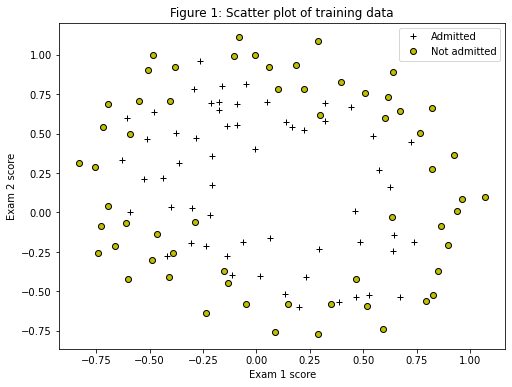

In [22]:
def plotData(x, y):
    positive = y == 1 #Postive will be the array where indices of positive examples are stored.
    negative = y == 0    #Negative will be the array where indices of Negative examples are stored.

    plt.figure(figsize=(8, 6))

    plt.plot(x[positive, 0], x[positive, 1], 'k+')
    plt.plot(x[negative, 0], x[negative, 1], 'ko', mfc='y')

    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.title('Figure 1: Scatter plot of training data')
    plt.legend(['Admitted', 'Not admitted']) 
    
plotData(x, y)

In [23]:
def mapFeature(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(len(x1)).reshape(len(x1),1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j).reshape(len(x1),1)
            out= np.hstack((out,terms))
    return out
X = mapFeature(x[:,0], x[:,1],6)

In [24]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    return 1/ (1 + np.exp(-z))
def costFunctionReg(theta, X, y ,Lambda):
    """
    Take in numpy array of theta, X, and y to return the regularize cost function and gradient
    of a logistic regression
    """
    
    m=len(y)
    y=y[:,np.newaxis]
    predictions = sigmoid(X @ theta)
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)
    regCost= cost + Lambda/(2*m) * sum(theta**2)
    
    # compute gradient
    j_0= 1/m * (X.transpose() @ (predictions - y))[0]
    j_1 = 1/m * (X.transpose() @ (predictions - y))[1:] + (Lambda/m)* theta[1:]
    grad= np.vstack((j_0[:,np.newaxis],j_1))
    return regCost[0], grad

In [25]:
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))
# Set regularization parameter lambda to 1
Lambda = 1
#Compute and display initial cost and gradient for regularized logistic regression
cost, grad=costFunctionReg(initial_theta, X, y, Lambda)
print("Cost at initial theta (zeros):",cost)

Cost at initial theta (zeros): 0.6931471805599461


In [26]:
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunctionReg(theta,X,y,Lambda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history
theta , J_history = gradientDescent(X,y,initial_theta,1,800,0.2)
print("The regularized theta using ridge regression:\n",theta)

The regularized theta using ridge regression:
 [[ 2.25319925]
 [ 1.44552304]
 [ 2.33283826]
 [-3.57008088]
 [-2.35002923]
 [-3.07091092]
 [ 0.501193  ]
 [-0.88407353]
 [-0.69606577]
 [-0.22204479]
 [-2.69560971]
 [ 0.04161219]
 [-1.31573587]
 [-0.80286334]
 [-2.23101503]
 [-0.39638095]
 [-0.43758121]
 [ 0.09476682]
 [-0.69300408]
 [-0.78996183]
 [-0.45416785]
 [-2.01051741]
 [ 0.16446875]
 [-0.59855444]
 [ 0.11471794]
 [-0.73960036]
 [-0.52044138]
 [-1.38532251]]


No handles with labels found to put in legend.


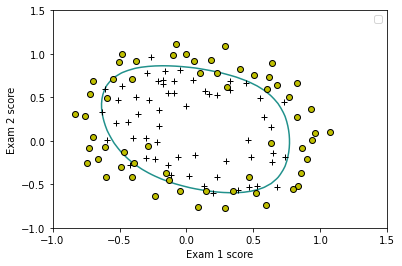

In [27]:
def mapFeaturePlot(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out

positive = y == 1
negative = y == 0

plt.plot(x[positive, 0], x[positive, 1], 'k+', )
plt.plot(x[negative, 0], x[negative, 1], 'ko', mfc='y')

# Plotting decision boundary
u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta
plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)